## Simulation of SiN loaded LNOI coupler


Thach Nguyen

### This file for calculating the coupling coefficient betwen the ring and waveguide with SiO2 cover

### Importing important python modules

In [1]:
%matplotlib inline

In [2]:
import reme                      # REME module
import numpy as np

********************************************************************************
         Maplotlib mplot3d toolkit3D will be used for 3D plotting.
         No module named 'enthought'
********************************************************************************


### Setting the operating wavelength

In [3]:
wavelength = 1.55e-6             # The waveguide is leaky at this wavelength
reme.set_wavelength(wavelength)

### Defining the material layer thickness parameters

In [4]:
m_linbo3_or = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TM)    # Ordinary index; using built-in Sellmier equation 
m_linbo3_ex = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TE)    # Extradinary index; using built-in Sellmier equation 

m_sin = reme.SellmierMaterial(1, 3.0249, 0.1353406 ** 2, 40314, 1239.842 ** 2, 0, 0,'SiN')  
# Run reme.SellmierMaterial? in a new cell for explantion of parameters when defining material using Sellmier equation
m_sio2 = reme.MaterialSiO2()
m_air = reme.MaterialAir()

In [5]:
# Define anisotropic LiNbO3: X-cut, Y-propagating
m_linbo3_y = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Y')   # Anisotropic LiNbO3 
m_linbo3_z = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Z')   # Anisotropic LiNbO3 

### We are changing the coupling gap to get cross coupling coefficient 20 percent

In [6]:
t_s = 1.5e-6                    # SiO2 bottom thickness
t_c = 1.5e-6                    # Sio2 cover thickness
t_linbo3 = 0.3e-6             # LNOI film thickness
t_sin = 300e-9                # Unetched SiN film thickness
core_width = 1.0e-6             # Waveguide core width
clad_width = 3e-6 # Simulation window width
gap = 1.1e-6
radius = 300e-6

### Slab modes

### With SiO2 cover

In [7]:
# Changed Air cover to SiO2 cover
core_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sio2(t_s + t_sin))
core_te_y.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_y.set_TM(False)
core_te_y.find_modes()
clad_te_y.find_modes()

In [8]:
n_te_core_y = core_te_y.get_effective_index_TE(0).real
n_te_clad_y = clad_te_y.get_effective_index_TE(0).real

In [9]:
# Changed Air cover to SiO2 cover
core_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sio2(t_s + t_sin))
core_tm_y.set_TE(False)
clad_tm_y.set_TE(False)

In [10]:
core_tm_y.find_modes()
clad_tm_y.find_modes()

In [11]:
n_tm_core_y = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_y = clad_tm_y.get_effective_index_TM(0).real

In [12]:
n_te_clad_y

1.779696865309212

In [13]:
n_te_core_y

1.9077051715807525

In [14]:
# Changed Air cover to SiO2 cover
core_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sio2(t_s + t_sin))
core_te_z.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_z.set_TM(False)
core_te_z.find_modes()
clad_te_z.find_modes()

In [15]:
n_te_core_z = core_te_z.get_effective_index_TE(0).real
n_te_clad_z = clad_te_z.get_effective_index_TE(0).real

In [16]:
# Changed Air cover to SiO2 cover
core_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))
clad_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sio2(t_s + t_sin))
core_tm_z.set_TE(False)
clad_tm_z.set_TE(False)

In [17]:
core_tm_z.find_modes()
clad_tm_z.find_modes()

In [18]:
n_tm_core_z = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_z = clad_tm_y.get_effective_index_TM(0).real

In [19]:
n_te_clad_z

1.83846848611742

In [20]:
n_te_core_z

1.9520410843135267

### Simulate 2D waveguide mode

#### Defining a RWG waveguide geometry from core and cladding slabs

We need to use anisotropic LiNbO3 when defining the waveguides

### With SiO2 cover

In [21]:
# Changed Air cover to SiO2 cover
clad_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sio2(t_s + t_sin))
core_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))

In [22]:
# Changed Air cover to SiO2 cover
clad_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sio2(t_s + t_sin))
core_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sin(t_sin) + m_sio2(t_s))

In [23]:
rwg_z = reme.RWG(clad_z(clad_width) + core_z(core_width) + clad_z(clad_width))

In [24]:
# # View the waveguide structure
# rwg_z.view()

In [25]:
guide_straight_z = reme.FDStraight(rwg_z, 101, 401, cell_averaging=True)
guide_straight_z.set_left_boundary(reme.PEC)        
guide_straight_z.set_right_boundary(reme.PEC)

In [26]:
guide_bent_z = reme.FDBent(rwg_z, 101, 401, cell_averaging=True)
guide_bent_z.set_radius(radius)
guide_bent_z.set_left_boundary(reme.PEC)        
guide_bent_z.set_right_boundary(reme.PEC)

In [27]:
guide_straight_z.find_mode(n_te_core_z)

0

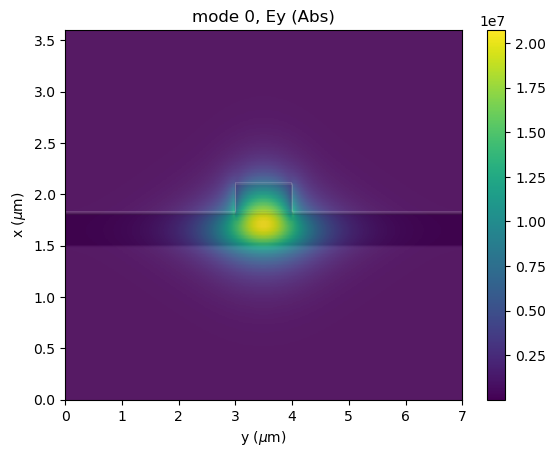

In [28]:
guide_straight_z.plot_mode(0, 'Ey', 'Abs')

In [29]:
neff_straight_z = guide_straight_z.get_mode_effective_index(0).real

In [30]:
guide_bent_z.find_mode(neff_straight_z * 2.0 * np.pi / 1.55e-6 * radius)

0

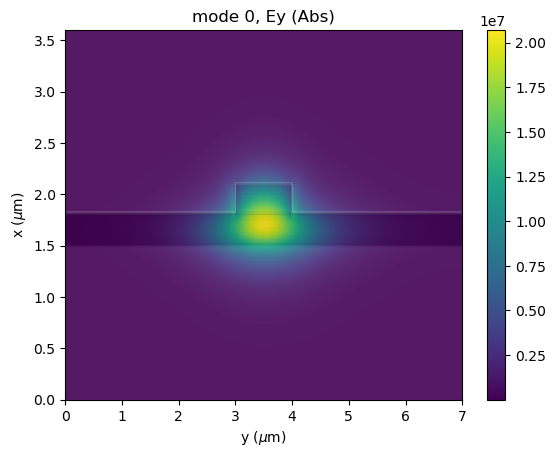

In [31]:
guide_bent_z.plot_mode(0, 'Ey', 'Abs')

### Define the coupler

In [32]:
# Define the coupler section of racetrack ring, it has two waveguide paths: a ring and straight waveguide
coupler = reme.Coupler(2)
coupler.add_bent_guide(0, guide_bent_z)
coupler.add_straight_guide(0, guide_straight_z)

In [33]:
# The bus waveguide is offset by w+G; For the coupler between two rings you need to add a bent waveguide to path 1 as well (similar to the previous cell)
coupler.add_straight_guide(1, guide_straight_z, core_width + gap)

In [34]:
coupler.set_straight_length(0, 0e-6)
coupler.set_coupler_length(100e-6)

In [35]:
# Number of cross-secion sampling points used in the integrations
coupler.set_sampling(101, 401)

In [36]:
# Number of propagation steps along z-direction
coupler.set_num_steps(101)

In [37]:
# Calculate the coupler response
coupler.calculate()

In [38]:
print("Coupler transfer ratio: {}".format(abs(coupler.get_S_reduced(0, 0, 0, 0))**2))
print("Coupler coupling ratio: {}".format(abs(coupler.get_S_reduced(1, 0, 0, 0))**2))


Coupler transfer ratio: 0.7943689757269278
Coupler coupling ratio: 0.20049619333588853


In [39]:
# Open a dialog to plot the transfer matrix evolution
#coupler.plot_transfer_matrix()

In [40]:
abs(coupler.get_S_reduced(0, 0, 0, 0))**2 + abs(coupler.get_S_reduced(1, 0, 0, 0))**2

0.9948651690628163

In [41]:
coupler.get_S(0, 0, 0, 0)

(-0.1820814742459525-0.8724765397782044j)

### Scan the straight section length

In [94]:
num_points = 51
lengths1 = np.linspace(0, 50e-6, num_points)
lengths2 = np.linspace(0, 50e-6, num_points)
coupler_cross_coupling_bent_straight1 = np.zeros(num_points)
coupler_straight_coupling_bent_bent1 = np.zeros(num_points)
coupler_cross_coupling_straight_bent1 = np.zeros(num_points)
coupler_straight_coupling_straight_straight1 = np.zeros(num_points)

In [95]:
for i in range(num_points):
    coupler.set_straight_length(0, lengths1[i])
    coupler.set_coupler_length(100e-6 + lengths1[i])
    coupler.calculate()
    coupler_cross_coupling_bent_straight1[i] = abs(coupler.get_S_reduced(0, 1, 0, 0))**2
    coupler_straight_coupling_bent_bent1[i] = abs(coupler.get_S_reduced(0, 0, 0, 0))**2
    coupler_cross_coupling_straight_bent1[i] = abs(coupler.get_S_reduced(1, 0, 0, 0))**2
    coupler_straight_coupling_straight_straight1[i] = abs(coupler.get_S_reduced(1, 1, 0, 0))**2

In [96]:
#coupler.plot_transfer_matrix()

In [97]:
import matplotlib.pyplot as plt

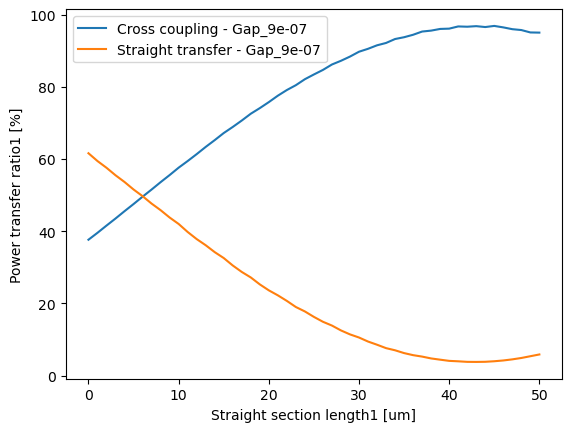

In [98]:
plt.plot( lengths1* 1e6, coupler_cross_coupling_straight_bent1 * 100, label="Cross coupling - Gap_{}".format(gap))
plt.plot( lengths1* 1e6, coupler_straight_coupling_bent_bent1 * 100, label="Straight transfer - Gap_{}".format(gap))
plt.xlabel("Straight section length1 [um]")
plt.ylabel("Power transfer ratio1 [%]")
plt.legend()
plt.show()

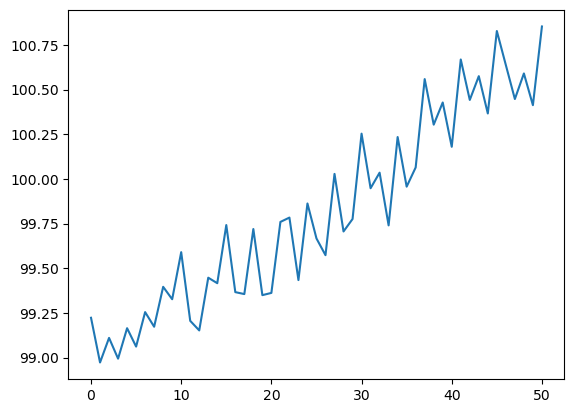

[0.61592232 0.59430409 0.57567195 0.55490693 0.53627149 0.51549698
 0.49701874 0.47642325 0.45820545 0.43786149 0.42000475 0.39779077
 0.37811233 0.36106817 0.34193691 0.32555741 0.30496087 0.28704556
 0.27180084 0.25258639 0.2360725  0.22224641 0.20680134 0.18985574
 0.17759352 0.16250451 0.1489956  0.13849093 0.12500483 0.1140381
 0.10537336 0.09422034 0.08540774 0.0759403  0.06998025 0.06221169
 0.05649107 0.05250663 0.04737842 0.04396938 0.040666   0.03945361
 0.03794935 0.0377469  0.03810544 0.03961652 0.04176411 0.0448296
 0.04865715 0.05353528 0.05841796]


In [99]:
plt.plot(lengths1 * 1e6, (coupler_cross_coupling_straight_bent1 + coupler_straight_coupling_bent_bent1) * 100, label="Cross coupling- Gap_{}".format(gap))
plt.show()
print(coupler_straight_coupling_bent_bent1)

### Coupler length to achieve critical coupling

Bending radius: 230um

Straight section length: 2811um

For different loss values

In [100]:
ring_radius = 230e-6
straight_section_length = 2811e-6

In [101]:
def round_trip_power_transmission(propagation_loss):
    loss = (2.0 * np.pi * ring_radius + straight_section_length * 2.0) * 100 * propagation_loss
    return 10.0 ** (-loss / 10)    

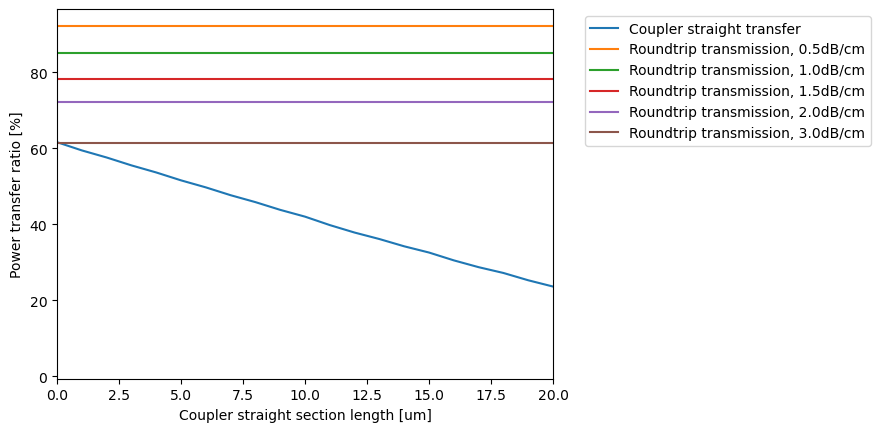

[0.61592232 0.59430409 0.57567195 0.55490693 0.53627149 0.51549698
 0.49701874 0.47642325 0.45820545 0.43786149 0.42000475 0.39779077
 0.37811233 0.36106817 0.34193691 0.32555741 0.30496087 0.28704556
 0.27180084 0.25258639 0.2360725  0.22224641 0.20680134 0.18985574
 0.17759352 0.16250451 0.1489956  0.13849093 0.12500483 0.1140381
 0.10537336 0.09422034 0.08540774 0.0759403  0.06998025 0.06221169
 0.05649107 0.05250663 0.04737842 0.04396938 0.040666   0.03945361
 0.03794935 0.0377469  0.03810544 0.03961652 0.04176411 0.0448296
 0.04865715 0.05353528 0.05841796]


In [102]:
plt.plot(lengths2 * 1e6, coupler_straight_coupling_bent_bent1 * 100, label="Coupler straight transfer")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(0.5) * 100 for x in lengths2], label="Roundtrip transmission, 0.5dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(1.0) * 100 for x in lengths2], label="Roundtrip transmission, 1.0dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(1.5) * 100 for x in lengths2], label="Roundtrip transmission, 1.5dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(2.0) * 100 for x in lengths2], label="Roundtrip transmission, 2.0dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(3.0) * 100 for x in lengths2], label="Roundtrip transmission, 3.0dB/cm")
plt.xlim(0, 20)
plt.xlabel("Coupler straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
print(coupler_straight_coupling_bent_bent1)

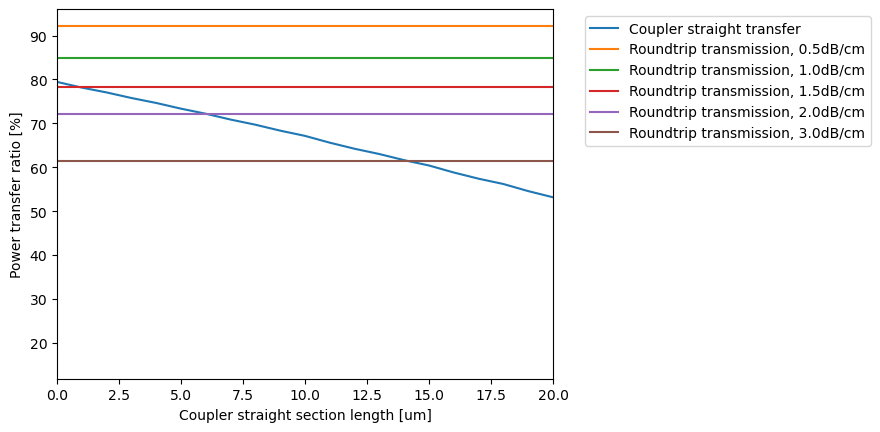

[0.79436898 0.78141557 0.77038202 0.75773305 0.74643131 0.73343806
 0.72190313 0.70861504 0.69691279 0.68338432 0.67147973 0.65598585
 0.6421566  0.63011686 0.61613723 0.60405658 0.58807445 0.57397168
 0.56187973 0.54574635 0.53164309 0.51966002 0.50562092 0.48949857
 0.47766429 0.46222039 0.44781178 0.43622792 0.42042433 0.4069181
 0.39570428 0.3802352  0.36710764 0.35189696 0.34128598 0.32642602
 0.31396417 0.30380858 0.2895437  0.2776493  0.26386739 0.25452098
 0.24123181 0.23025641 0.21745262 0.20899484 0.19678665 0.1848974
 0.17526917 0.16401178 0.15680844]


In [52]:
plt.plot(lengths2 * 1e6, coupler_straight_coupling_bent_bent1 * 100, label="Coupler straight transfer")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(0.5) * 100 for x in lengths2], label="Roundtrip transmission, 0.5dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(1.0) * 100 for x in lengths2], label="Roundtrip transmission, 1.0dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(1.5) * 100 for x in lengths2], label="Roundtrip transmission, 1.5dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(2.0) * 100 for x in lengths2], label="Roundtrip transmission, 2.0dB/cm")
plt.plot(lengths2 * 1e6, [round_trip_power_transmission(3.0) * 100 for x in lengths2], label="Roundtrip transmission, 3.0dB/cm")
plt.xlim(0, 20)
plt.xlabel("Coupler straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
print(coupler_straight_coupling_bent_bent1)

In [245]:
a = reme.FMMBent(rwg_z)

In [120]:
a.find_modes?